# Examples of fixing convergence: Real and Matern Kernels


In [1]:
#import necessary python libraries
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, minimize
import pandas as pd
import math
from JSON_to_DF import JSON_to_DataFrame
from Lightcurve_class import *
import celerite
import pickle
import seaborn as sns
%matplotlib notebook

In [2]:
#Create Kernels for Gaussian Process

#Real term parameter initialization
a = 1e-2
c = 1
#Matern term parameter initialization
sig = 1e-4
rho = 100

#Bounds on parameters 
bounds = dict(log_a = (-15,15), log_c = (-15,15))
bounds = dict(log_sigma = (-15, 15), log_rho = (-15, 15))

#Create Kernels
Real = celerite.terms.RealTerm(log_a = np.log(a), log_c = np.log(c), bounds=bounds)
Matern = celerite.terms.Matern32Term(log_sigma = np.log(sig), log_rho = np.log(rho))

## Example 1: Supernovae 'Gaia14ado'



In [3]:
SN1 = Supernovae("../../../OSC_data/JSON_data/sne-2010-2014-master/Gaia14ado.json")
SN1.load_LightCurves()
SN1.load_fit_data()
SN1.serialize()

/Users/ethanmarx/anaconda/envs/NUREU17/lib/python3.6/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['band', 'source', 'telescope']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/Users/ethanmarx/anaconda/envs/NUREU17/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:204: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(time_del, flux_del, degree, w=flux_err_del)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:204: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(time_del, flux_del, degree, w=flux_err_del)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNo

Gaia14ado


In [9]:
'''Print the filter, summary statistics, number of good observations (anything with six or less should have been skipped),
 and the flux predictions array'''

for filt in SN1.Lightcurves:
    print("filter: " + filt + "\n")
    print("Summary Statistic: ", SN1.Lightcurves[filt].Rchi2 ,"\n" )
    print("Number of good observations: ", SN1.Lightcurves[filt].n_good_obs, "\n")
    print("Flux predictions: ", SN1.Lightcurves[filt].flux_predicts, "\n")
bad_filts = []
for filt in SN1.Lightcurves:
    if(SN1.Lightcurves[filt].Rchi2):
        bad_filts.append(filt)
        


filter: B_4,5

Summary Statistic:  {} 

Number of good observations:  5 

Flux predictions:  [] 

filter: R_4,5

Summary Statistic:  {} 

Number of good observations:  3 

Flux predictions:  [] 

filter: I_4,5

Summary Statistic:  {} 

Number of good observations:  6 

Flux predictions:  [] 

filter: V_4,5

Summary Statistic:  {'polynomial_4': 7.9902603574249431, 'polynomial_6': 7.998179752753658, 'polynomial_8': 7.9978910646877166, 'Kapernka': 8.0384324391157005, 'Bazin': 7.944716044317552, 'GP_Real': nan, 'GP_Matern': nan} 

Number of good observations:  109 

Flux predictions:  [ 0.18923322  0.18938498  0.18923493  0.18919233  0.18971568         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         na

['V_4,5', 'r_4,5', 'g_4,5', 'i_4,5']

<IPython.core.display.Javascript object>


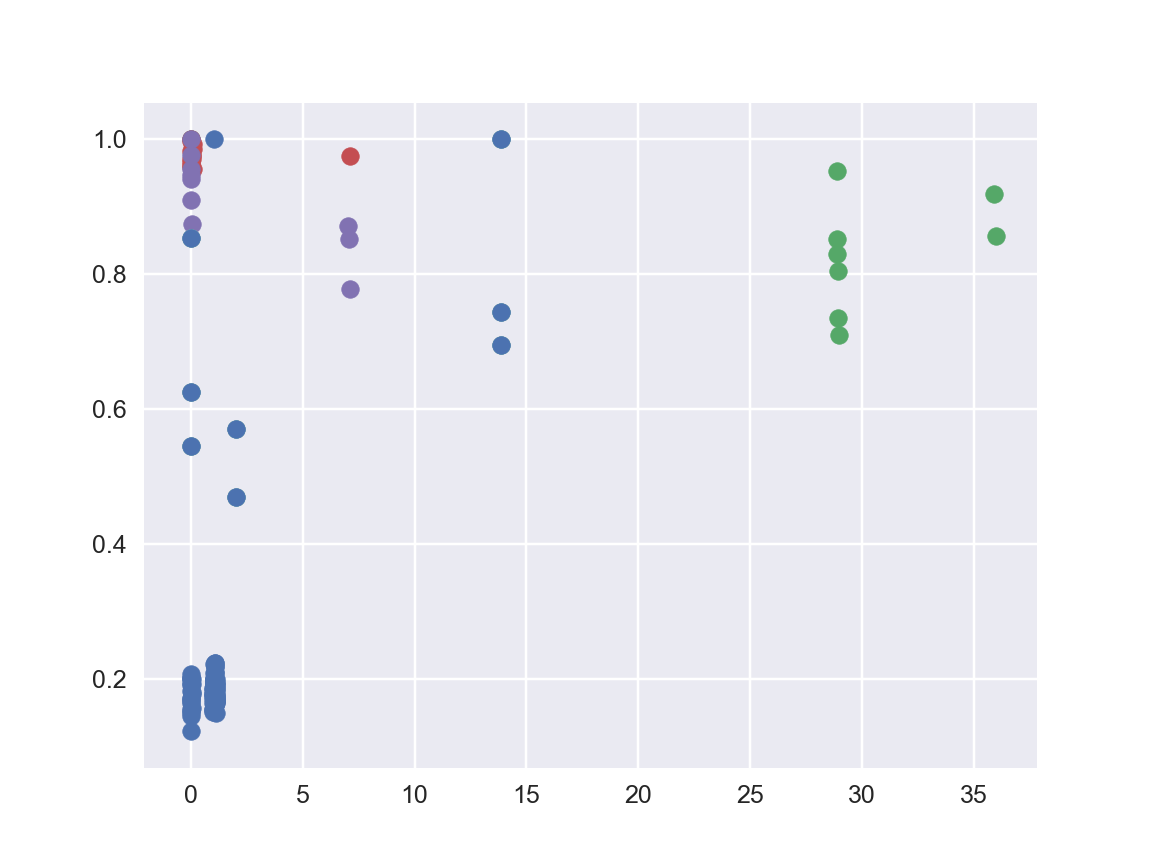

In [12]:
plt.figure()
for filt in bad_filts:
    time = SN1.Lightcurves[filt].time
    flux = SN1.Lightcurves[filt].flux
    plt.scatter(time,flux)

In [21]:
SN1.Lightcurves['V_4,5'].Gaussian_process(Real)

/Users/ethanmarx/anaconda/envs/NUREU17/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


(nan,)

## Example 2: Supernovae 'Gaia15abk'



In [14]:
SN2 = Supernovae("../../../OSC_data/JSON_data/sne-2010-2014-master/Gaia15abk.json")
SN2.load_LightCurves()
SN2.load_fit_data()

/Users/ethanmarx/anaconda/envs/NUREU17/lib/python3.6/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['band', 'source', 'telescope']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:293: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(self.time, self.flux, degree, w=self.flux_err)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:204: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(time_del, flux_del, degree, w=flux_err_del)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:204: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(time_del, flux_del, degree, w=flux_err_del)
/Users/ethanmarx/Docu

Gaia15abk


/Users/ethanmarx/anaconda/envs/NUREU17/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [23]:
'''Print the filter, summary statistics, number of good observations (anything with six or less should have been skipped),
 and the flux predictions array'''

for filt in SN2.Lightcurves:
    print("filter: " + filt + "\n")
    print("Summary Statistic: ", SN2.Lightcurves[filt].Rchi2 ,"\n" )
    print("Number of good observations: ", SN2.Lightcurves[filt].n_good_obs, "\n")
    print("Flux predictions: ", SN2.Lightcurves[filt].flux_predicts, "\n")
bad_filts_2 = []
for filt in SN2.Lightcurves:
    if(SN2.Lightcurves[filt].Rchi2):
        bad_filts_2.append(filt)


filter: g_3,4

Summary Statistic:  {'polynomial_4': 30.999470828314411, 'polynomial_6': 9586.1715584222075, 'polynomial_8': 11838.291183537127, 'Kapernka': 14.7915402331601, 'Bazin': 15.099140382748498, 'GP_Real': nan, 'GP_Matern': nan} 

Number of good observations:  8 

Flux predictions:  [ 0.68770089         nan         nan         nan         nan         nan
         nan  0.68770089] 

filter: B_3,4

Summary Statistic:  {} 

Number of good observations:  1 

Flux predictions:  [] 

filter: V_3,4

Summary Statistic:  {} 

Number of good observations:  1 

Flux predictions:  [] 

filter: r_3,4

Summary Statistic:  {} 

Number of good observations:  1 

Flux predictions:  [] 



<IPython.core.display.Javascript object>


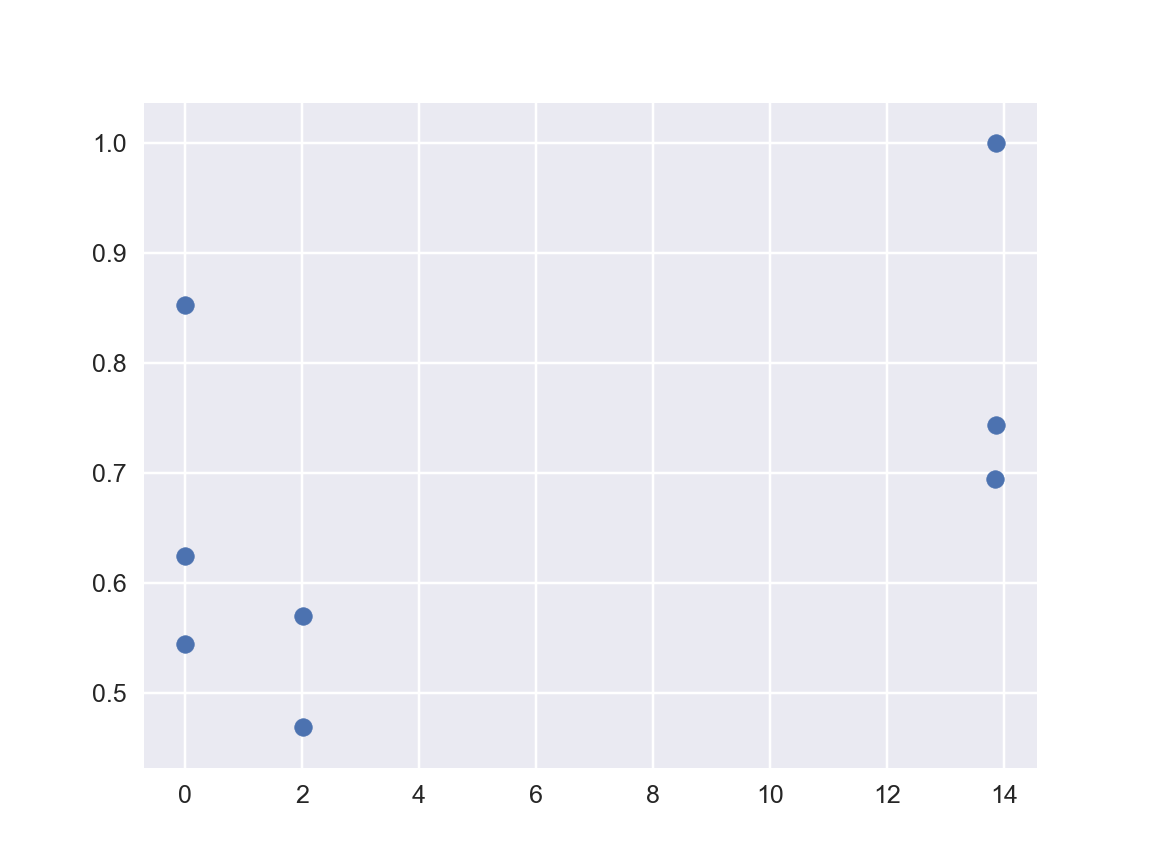

In [24]:
plt.figure()
for filt in bad_filts_2:
    time = SN2.Lightcurves[filt].time
    flux = SN2.Lightcurves[filt].flux
    plt.scatter(time,flux)

## Example 3: Supernovae 'OGLE-2014-SN-080'

In [25]:
SN3 = Supernovae("../../../OSC_data/JSON_data/sne-2010-2014-master/OGLE-2014-SN-080.json")
SN3.load_LightCurves()
SN3.load_fit_data()

OGLE-2014-SN-080


/Users/ethanmarx/anaconda/envs/NUREU17/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [25]:
'''Print the filter, summary statistics, number of good observations (anything with six or less should have been skipped),
 and the flux predictions array'''

for filt in SN3.Lightcurves:
    print("filter: " + filt + "\n")
    print("Summary Statistic: ", SN3.Lightcurves[filt].Rchi2 ,"\n" )
    print("Number of good observations: ", SN3.Lightcurves[filt].n_good_obs, "\n")
    print("Flux predictions: ", SN3.Lightcurves[filt].flux_predicts, "\n")

filter: I_1,3

Summary Statistic:  {'polynomial_4': 14.342619366923952, 'polynomial_6': 44.801541260213746, 'polynomial_8': 529.86861765552203, 'Kapernka': 2.3505121262970823, 'Bazin': 3.2284651715057762, 'GP_Real': nan, 'GP_Matern': nan} 

Number of good observations:  21 

Flux predictions:  [ 0.36045582         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan  0.36045582] 



<IPython.core.display.Javascript object>


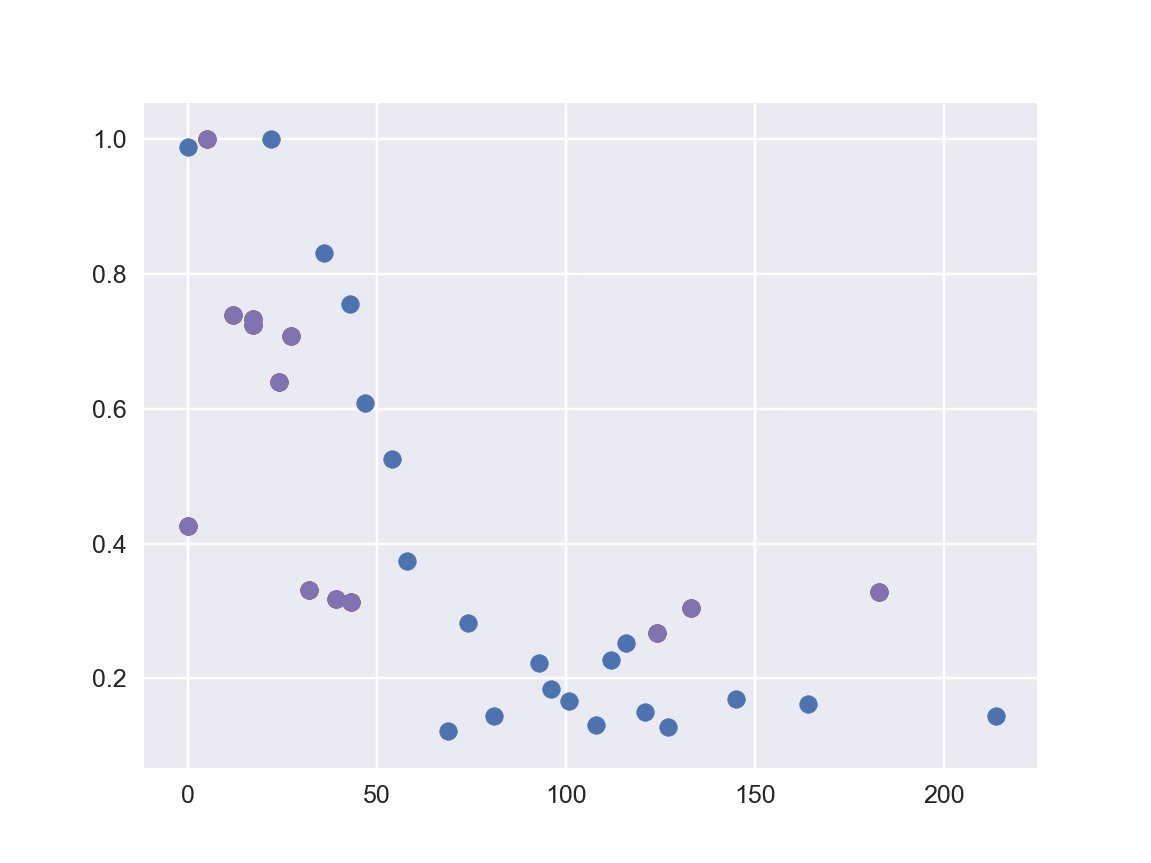

['I_1,3']


In [30]:
plt.figure()

for filt in SN3.Lightcurves:
    if(SN3.Lightcurves[filt].Rchi2):
        bad_filts_3.append(filt)
print(bad_filts_3)
for filt in bad_filts_3:
    time = SN3.Lightcurves[filt].time
    flux = SN3.Lightcurves[filt].flux
    plt.scatter(time,flux)

## Example 4:  Supernovae 'OGLE-2014-SN-132'

In [34]:
SN4 = Supernovae("../../../OSC_data/JSON_data/sne-2010-2014-master/OGLE-2014-SN-132.json")
SN4.load_LightCurves()
SN4.load_fit_data()

/Users/ethanmarx/anaconda/envs/NUREU17/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


RuntimeError: failed to factorize or solve matrix

In [35]:
'''Print the filter, summary statistics, number of good observations (anything with six or less should have been skipped),
 and the flux predictions array'''

for filt in SN4.Lightcurves:
    print("filter: " + filt + "\n")
    print("Summary Statistic: ", SN4.Lightcurves[filt].Rchi2 ,"\n" )
    print("Number of good observations: ", SN4.Lightcurves[filt].n_good_obs, "\n")
    print("Flux predictions: ", SN4.Lightcurves[filt].flux_predicts, "\n")

filter: I_1,3

Summary Statistic:  {'polynomial_4': 10.858259047376087, 'polynomial_6': 957.30098112392159, 'polynomial_8': 214429.74192860202, 'Kapernka': 2.5847078312576293, 'Bazin': 2.7900630365285717, 'GP_Real': nan} 

Number of good observations:  13 

Flux predictions:  [ 0.52557146         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
  0.52557146] 



<IPython.core.display.Javascript object>


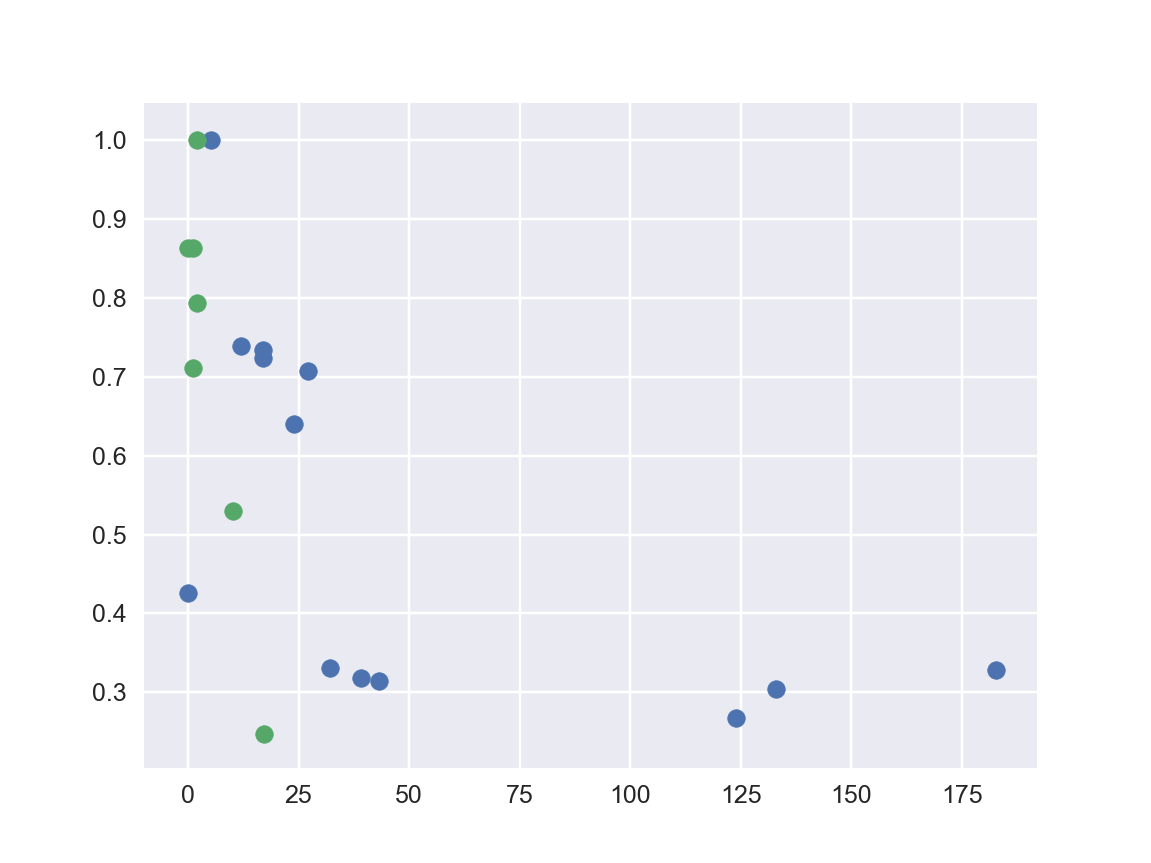

In [40]:
plt.figure()
bad_filts_4 = []
for filt in SN4.Lightcurves:
    if(SN4.Lightcurves[filt].Rchi2):
        bad_filts_4.append(filt)

for filt in bad_filts_4:
    time = SN4.Lightcurves[filt].time
    flux = SN4.Lightcurves[filt].flux
    plt.scatter(time,flux)

## Example 5: Supernovae ''

In [41]:
SN5 = Supernovae("../../../OSC_data/JSON_data/sne-2010-2014-master/PTF11bij.json")
SN5.load_LightCurves()
SN5.load_fit_data()

/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:204: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(time_del, flux_del, degree, w=flux_err_del)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:204: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(time_del, flux_del, degree, w=flux_err_del)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:204: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(time_del, flux_del, degree, w=flux_err_del)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:204: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(time_del, flux_del, degree, w=flux_err_del)
/Users/ethanmarx/Documents/LSST/NUREU17/LSST/SuperNovaLightCurves/Lightcurve_class.py:204: RankWarning: Polyfit may be poorly conditioned
  Coeffs = np.polyfit(time_del, flux_del, degr

PTF11bij


/Users/ethanmarx/anaconda/envs/NUREU17/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [42]:
'''Print the filter, summary statistics, number of good observations (anything with six or less should have been skipped),
 and the flux predictions array'''

for filt in SN5.Lightcurves:
    print("filter: " + filt + "\n")
    print("Summary Statistic: ", SN5.Lightcurves[filt].Rchi2 ,"\n" )
    print("Number of good observations: ", SN5.Lightcurves[filt].n_good_obs, "\n")
    print("Flux predictions: ", SN5.Lightcurves[filt].flux_predicts, "\n")

filter: g_2

Summary Statistic:  {} 

Number of good observations:  4 

Flux predictions:  [] 

filter: r_2

Summary Statistic:  {'polynomial_4': 101148.09449976876, 'polynomial_6': 380137.44192828028, 'polynomial_8': 1708686.68678349, 'Kapernka': 2.2343819346462039, 'Bazin': 21.210296918519649, 'GP_Real': nan, 'GP_Matern': nan} 

Number of good observations:  7 

Flux predictions:  [ 0.71539517         nan         nan         nan         nan         nan
  0.71539517] 

filter: i_2

Summary Statistic:  {} 

Number of good observations:  3 

Flux predictions:  [] 



<IPython.core.display.Javascript object>


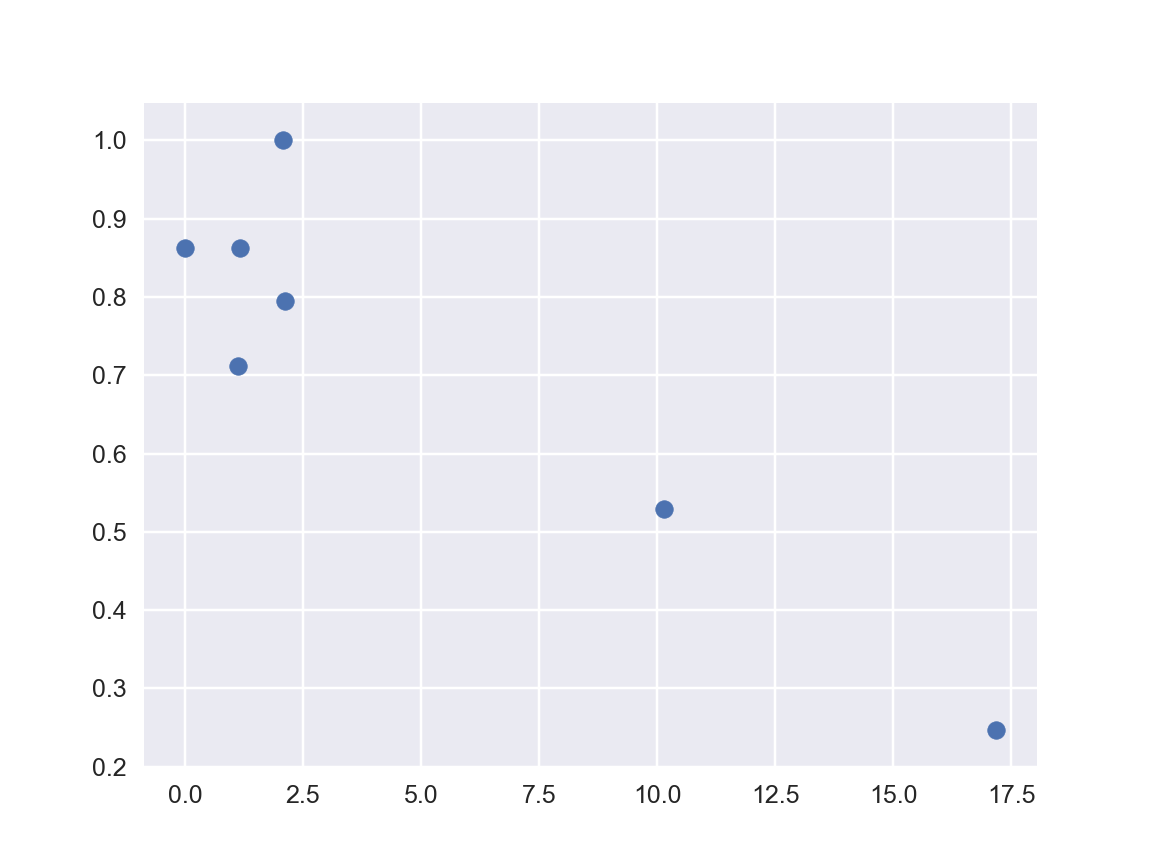

In [44]:
plt.figure()
bad_filts_5 = []
for filt in SN5.Lightcurves:
    if(SN5.Lightcurves[filt].Rchi2):
        bad_filts_5.append(filt)
        
for filt in bad_filts_5:
    time = SN5.Lightcurves[filt].time
    flux = SN5.Lightcurves[filt].flux
    plt.scatter(time,flux)